<a href="https://colab.research.google.com/github/raharevo/tugaspython/blob/main/tugaspython11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
cd /content/drive/MyDrive/Tugas py

/content/drive/MyDrive/Tugas py


In [ ]:
ls

3scene/  highwytes.jpg  image/  imageset/  tes@


In [ ]:
# import the necessary packages
from keras.models import Sequential
from keras.layers.core import Activation
from keras.layers.core import Flatten
from keras.layers.core import Dense
from keras.optimizers import Adam
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from PIL import Image
from imutils import paths
import numpy as np
import os

In [ ]:
# grab all image paths in the input dataset directory, then initialize
# our list of images and corresponding class labels
print("[INFO] loading images...")
imagePaths = paths.list_images("image")
data = []
labels = []

[INFO] loading images...


In [ ]:
# loop over our input images
for imagePath in imagePaths:
	# load the input image from disk, resize it to 64x64 pixels, scale
	# the pixel intensities to the range [0, 1], and then update our
	# images list
	image = Image.open(imagePath)
  #preprocessing
	image = np.array(image.resize((64, 64))) / 255.0 #normalisasi
	data.append(image)

	# extract the class label from the file path and update the
	# labels list
	label = imagePath.split(os.path.sep)[-2]
	labels.append(label)

In [ ]:
print(labels)

['GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08', 'GMB_08',

In [ ]:
# encode the labels, converting them from strings to integers
lb = LabelBinarizer()
labels = lb.fit_transform(labels)

In [ ]:
print(labels)

[[0 1 0 0 0]
 [0 1 0 0 0]
 [0 1 0 0 0]
 ...
 [0 0 1 0 0]
 [0 0 1 0 0]
 [0 0 1 0 0]]


In [ ]:
# perform a training and testing split, using 75% of the data for
# training and 25% for evaluation
(trainX, testX, trainY, testY) = train_test_split(np.array(data),	np.array(labels), test_size=0.25, shuffle=True)
print(trainX.shape)
print(testX.shape)

(447, 64, 64, 3)
(149, 64, 64, 3)


In [ ]:
from keras.layers import Convolution2D, MaxPooling2D
from keras.models import Sequential
from keras.layers.core import Flatten, Dense

model1 = Sequential()
model1.add(Convolution2D(8, (3,3), activation='relu', input_shape=(64,64,3)))
model1.add(MaxPool2D(2,2))
model1.add(Convolution2D(16, (3,3), activation='relu'))
model1.add(MaxPool2D(2,2))
#fully connected layer
model1.add(Flatten())
model1.add(Dense(100, activation='relu'))
model1.add(Dense(5, activation='softmax'))

model1.summary()

Model: "sequential_28"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 62, 62, 8)         224       
_________________________________________________________________
max_pooling2d_20 (MaxPooling (None, 31, 31, 8)         0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 29, 29, 16)        1168      
_________________________________________________________________
max_pooling2d_21 (MaxPooling (None, 14, 14, 16)        0         
_________________________________________________________________
flatten_25 (Flatten)         (None, 3136)              0         
_________________________________________________________________
dense_20 (Dense)             (None, 100)               313700    
_________________________________________________________________
dense_21 (Dense)             (None, 5)               

In [ ]:
from keras.models import Sequential
from keras.layers.core import Flatten
from keras.layers.core import Dense

model = Sequential(
    [
        Flatten(input_shape=(64,64,3)),
        Dense(100, activation="relu", name="layer1"),
        Dense(16, activation="relu", name="layer2"),
        Dense(16, activation="relu", name="layer3"),
        Dense(5, activation = "softmax", name="layer4"),
    ]
)

In [ ]:
model.summary()

Model: "sequential_29"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_26 (Flatten)         (None, 12288)             0         
_________________________________________________________________
layer1 (Dense)               (None, 100)               1228900   
_________________________________________________________________
layer2 (Dense)               (None, 16)                1616      
_________________________________________________________________
layer3 (Dense)               (None, 16)                272       
_________________________________________________________________
layer4 (Dense)               (None, 5)                 85        
Total params: 1,230,873
Trainable params: 1,230,873
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# train the model using the Adam optimizer
print("[INFO] training network...")
opt = Adam(lr=1e-3, decay=1e-3 / 50)
model1.compile(loss="categorical_crossentropy", optimizer=opt, metrics=["accuracy"])

[INFO] training network...


In [ ]:
H = model1.fit(trainX, trainY, validation_data=(testX, testY), epochs=25, batch_size=32)

Epoch 1/25
14/14 [==============================] - 0s 23ms/step - loss: 1.5694 - accuracy: 0.3132 - val_loss: 1.4932 - val_accuracy: 0.3826
Epoch 2/25
14/14 [==============================] - 0s 6ms/step - loss: 1.3605 - accuracy: 0.4966 - val_loss: 1.3386 - val_accuracy: 0.3960
Epoch 3/25
14/14 [==============================] - 0s 6ms/step - loss: 1.1401 - accuracy: 0.5749 - val_loss: 1.2477 - val_accuracy: 0.3960
Epoch 4/25
14/14 [==============================] - 0s 6ms/step - loss: 1.0147 - accuracy: 0.6107 - val_loss: 1.1450 - val_accuracy: 0.5906
Epoch 5/25
14/14 [==============================] - 0s 6ms/step - loss: 0.8937 - accuracy: 0.6711 - val_loss: 1.0379 - val_accuracy: 0.5638
Epoch 6/25
14/14 [==============================] - 0s 6ms/step - loss: 0.7707 - accuracy: 0.7204 - val_loss: 0.9186 - val_accuracy: 0.6510
Epoch 7/25
14/14 [==============================] - 0s 7ms/step - loss: 0.6544 - accuracy: 0.7696 - val_loss: 0.8139 - val_accuracy: 0.6913
Epoch 8/25
14/14 [=

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


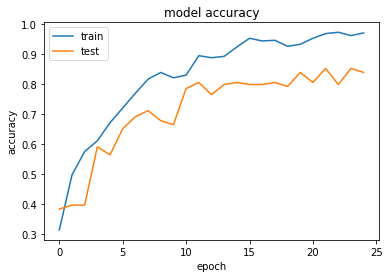

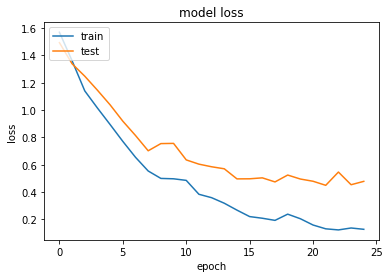

In [ ]:
import matplotlib.pyplot as plt

print(H.history.keys())
# summarize history for accuracy
plt.plot(H.history['accuracy'])
plt.plot(H.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
# summarize history for loss
plt.plot(H.history['loss'])
plt.plot(H.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
# evaluate the network
print("[INFO] evaluating network...")
predictions = model1.predict(testX, batch_size=32)
print(classification_report(testY.argmax(axis=1),
	predictions.argmax(axis=1), target_names=lb.classes_))

[INFO] evaluating network...
              precision    recall  f1-score   support

      GMB_07       0.78      0.72      0.75        29
      GMB_08       0.97      0.83      0.90        36
      GMB_09       1.00      0.89      0.94        28
      GMB_10       0.78      0.86      0.82        21
      GMB_11       0.72      0.89      0.79        35

    accuracy                           0.84       149
   macro avg       0.85      0.84      0.84       149
weighted avg       0.85      0.84      0.84       149



In [ ]:
model.save('nnmodel_scene')

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: nnmodel_scene/assets


In [ ]:
import cv2
import matplotlib.pyplot as plt
image1='daun.png'

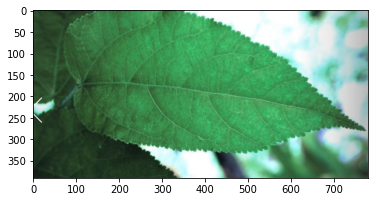

In [ ]:
img_array = cv2.imread(image1)
plt.imshow(img_array)
plt.show()
# print(type(img_array))

In [ ]:
image_testing = Image.open('daun.png')
image_testing = np.array(image_testing.resize((64, 64))) / 255.0
image_testing.shape

(64, 64, 3)

In [ ]:
image_testing = np.expand_dims(image_testing, axis=0)
print(image_testing.shape)

(1, 64, 64, 3)


In [ ]:
output = model.predict(image_testing, 1)
print(output)
print(lb.classes_[output.argmax(axis=1)])

[[0.18005508 0.19906425 0.27456757 0.21030289 0.13601018]]
['GMB_09']
